<a href="https://colab.research.google.com/github/wilmer-1/DM23/blob/main/Appendix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Logistic Regression model
import sklearn.linear_model as lm
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier # Do not confuse with DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

# MAKE PREDICTIONS - Linear Regression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#Random Forest
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

#boosting
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import KFold


#importing data using google drive
import numpy as np
from google.colab import drive

#linear regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA



In [ ]:
#connecting to google drive

drive.mount('/content/drive')
new_path = '/content/drive/My Drive/IEORPROJ'
os.chdir(new_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Logistic Regression


In [ ]:
#loading data

diabetes_data = pd.read_csv("DatasetOfDiabetes.csv")

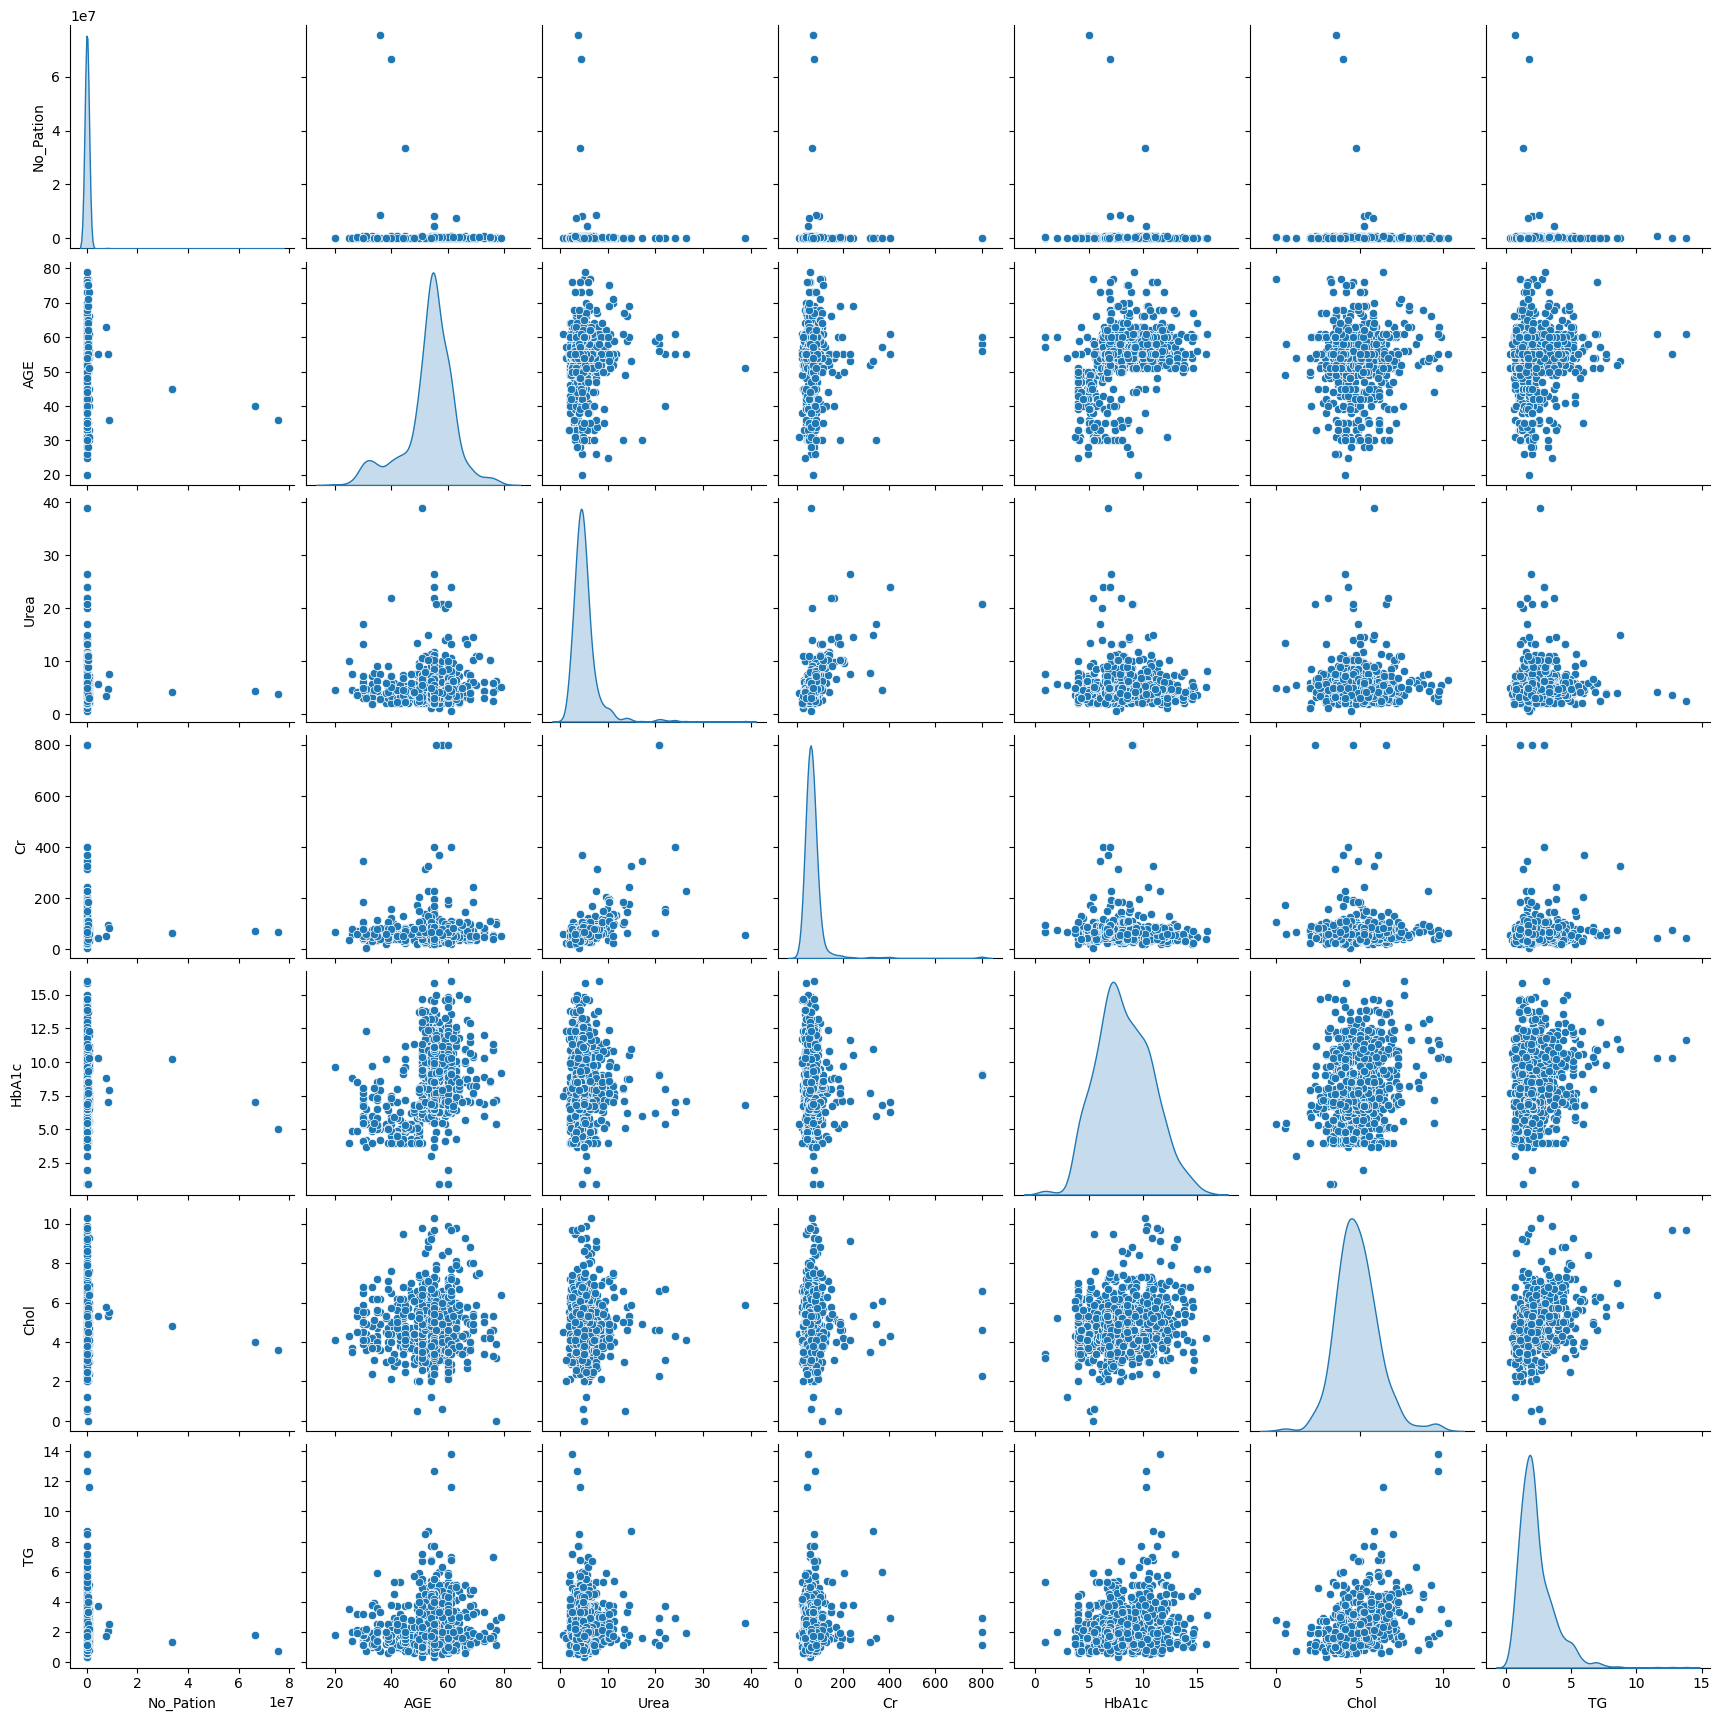

In [ ]:
sns.pairplot(diabetes_data.iloc[:,1:9],diag_kind='kde')

In [ ]:
# No. of Patient, Sugar Level Blood, Age, Gender, Creatinine ratio(Cr), Body Mass Index (BMI), Urea, Cholesterol (Chol), Fasting lipid profile, including total, LDL, VLDL, Triglycerides(TG) and HDL Cholesterol , HBA1C, Class
diabetes_data = diabetes_data.rename(columns = {'No_Pation': 'Patient_number', 'AGE': 'Age', 'Cr': 'Creatinine_ratio', 'Chol': 'Cholesterol', 'TG': 'Triglycerides'})

In [ ]:
#data cleaning and mapping class variable

diabetes_data['CLASS'] = diabetes_data['CLASS'].str.strip() # remove leading and trailing spaces
diabetes_data['Diabetic'] = diabetes_data['CLASS'].map({'Y': 1.0, 'N': 0.0, 'P' : 0.5})
diabetes_data['log_creatine'] = np.log(diabetes_data['Creatinine_ratio'])
diabetes_data['log_age'] = np.log(diabetes_data['Age'])
diabetes_data['Gender'] = diabetes_data['Gender'].str.strip().str.upper() # remove leading and trailing spaces
diabetes_data['Gender'] = diabetes_data['Gender'].map({'M': 1, 'F': 0})

<Axes: xlabel='Diabetic', ylabel='Count'>

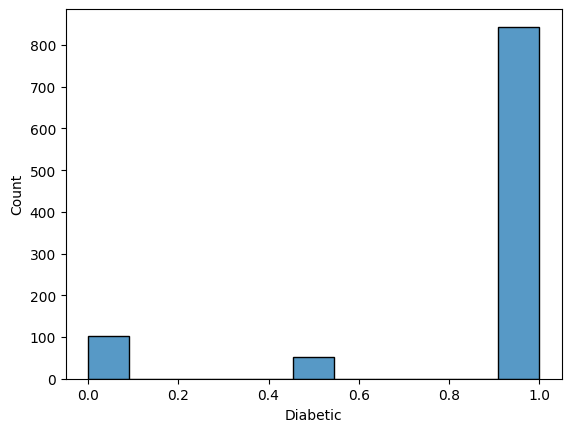

In [ ]:
sns.histplot(data=diabetes_data, x='Diabetic')

In [ ]:
#seeing count of each variable

diabetic_yes = diabetes_data[diabetes_data['CLASS'] == 'Y']
diabetic_pre = diabetes_data[diabetes_data['CLASS'] == 'P']
diabetic_no = diabetes_data[diabetes_data['CLASS'] == 'N']
print(len(diabetic_yes), len(diabetic_pre), len(diabetic_no))

844 53 103


In [ ]:
#splitting the data

def train_test_split(data):
    """
    Takes in a DataFrame `data` and randomly splits it into two smaller DataFrames
    named `train` and `test` with 80% and 20% of the data, respectively.
    """
    train_set_percent = 0.7
    data_len = data.shape[0]
    shuffled_indices = np.random.permutation(data_len)

    train_len = int(data_len * train_set_percent)
    train = data.iloc[shuffled_indices[:train_len]]
    test = data.iloc[shuffled_indices[train_len:data_len]]

    return train, test


diabetic_yes_train, diabetic_yes_test = train_test_split(diabetic_yes)
print("Diabetes_yes_train: " + str(len(diabetic_yes_train)) + " Diabetes_yes_test: " + str(len(diabetic_yes_test)))

diabetic_pre_train, diabetic_pre_test = train_test_split(diabetic_pre)
print("Diabetes_pre_train: " + str(len(diabetic_pre_train)) + "  Diabetes_pre_test:" + str(len(diabetic_pre_test)))

diabetic_no_train, diabetic_no_test = train_test_split(diabetic_no)
print("Diabetes_no_train: " + str(len(diabetic_no_train)) + "   Diabetes_yes_train: " + str(len(diabetic_no_test)))

# diabetic train dataset
diabetic_train = pd.concat([diabetic_yes_train, diabetic_pre_train, diabetic_no_train])
# diabetic test dataset
diabetic_test = pd.concat([diabetic_yes_test, diabetic_pre_test, diabetic_no_test])
print("Training set: " + str(len(diabetic_train)) + "       Testing set: " + str(len(diabetic_test)))

Diabetes_yes_train: 590 Diabetes_yes_test: 254
Diabetes_pre_train: 37  Diabetes_pre_test:16
Diabetes_no_train: 72   Diabetes_yes_train: 31
Training set: 699       Testing set: 301


In [ ]:
#Logistic Regression

logreg = smf.logit(formula = 'Diabetic ~ log_age + Urea + log_creatine + HbA1c + Cholesterol + Triglycerides + HDL + LDL + VLDL + BMI',
                       data = diabetic_train.drop(columns = ['CLASS'])).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.088237
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:               Diabetic   No. Observations:                  699
Model:                          Logit   Df Residuals:                      688
Method:                           MLE   Df Model:                           10
Date:                Fri, 13 Dec 2024   Pseudo R-squ.:                  0.7565
Time:                        18:38:50   Log-Likelihood:                -61.678
converged:                       True   LL-Null:                       -253.32
Covariance Type:            nonrobust   LLR p-value:                 3.387e-76
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -29.0202      5.699     -5.092      0.000     -40.190     -17.851
log_age           1

In [ ]:
# Results

p_hat = 0.5
y_probT = logreg.predict(diabetic_test)
y_test = diabetic_test["Diabetic"]
y_predT = pd.Series([1 if p > p_hat else 0 for p in y_probT], index=y_probT.index)
diabetic_test["predicted_prob"] = y_probT
diabetic_test["prediction"] = diabetic_test["predicted_prob"].apply(lambda x: 1 if (x > 0.666) else 0 if (x < 0.333) else 0.5)
diabetic_test

,ID,Patient_number,Gender,Age,Urea,Creatinine_ratio,HbA1c,Cholesterol,Triglycerides,HDL,LDL,VLDL,BMI,CLASS,Diabetic,log_creatine,log_age,predicted_prob,prediction
332,332,24082,0,61,3.3,31,7.2,5.8,2.6,1.6,0.9,1.5,36.0,Y,1.0,3.433987,4.110874,0.999977,1.0
737,349,39807,0,58,2.7,39,10.1,6.3,2.4,1.4,3.8,1.1,30.0,Y,1.0,3.663562,4.060443,0.999984,1.0
281,260,24058,1,60,3.5,60,7.6,4.7,1.3,0.9,3.3,0.6,37.0,Y,1.0,4.094345,4.094345,0.999893,1.0
929,104,345456,1,57,4.1,70,9.2,5.4,1.2,1.0,3.8,0.5,32.0,Y,1.0,4.248495,4.043051,0.999928,1.0
794,764,34545,1,54,4.5,70,10.5,4.3,2.4,1.6,1.7,2.0,28.0,Y,1.0,4.248495,3.988984,0.999866,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,626,34254,1,49,5.7,74,4.7,5.2,1.1,0.9,1.4,0.7,21.0,N,0.0,4.304065,3.891820,0.318350,0.0
12,82,46815,0,30,3.0,42,4.1,4.9,1.3,1.2,3.2,0.5,22.0,N,0.0,3.737670,3.401197,0.052679,0.0
21,97,12744,0,42,5.0,73,4.5,6.2,1.0,1.1,4.6,0.4,24.0,N,0.0,4.290459,3.737670,0.558250,0.5
39,741,34251,0,41,3.4,48,4.0,4.4,1.6,0.8,3.0,0.7,23.0,N,0.0,3.871201,3.713572,0.065303,0.0


<Axes: xlabel='prediction', ylabel='Count'>

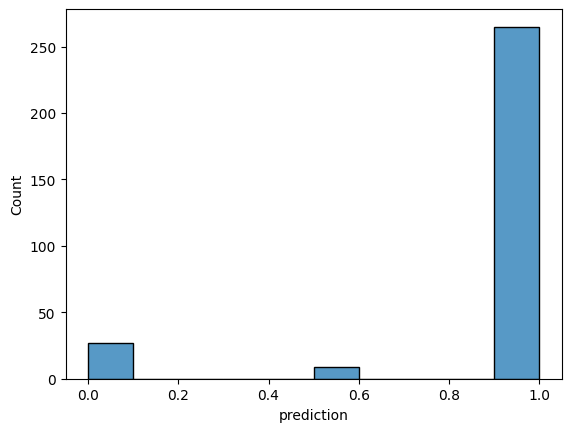

In [ ]:
sns.histplot(diabetic_test["prediction"])

In [ ]:
diabetic_test["difference"] = diabetic_test["prediction"] - diabetic_test["Diabetic"]
diabetic_test

,ID,Patient_number,Gender,Age,Urea,Creatinine_ratio,HbA1c,Cholesterol,Triglycerides,HDL,LDL,VLDL,BMI,CLASS,Diabetic,log_creatine,log_age,predicted_prob,prediction,difference
332,332,24082,0,61,3.3,31,7.2,5.8,2.6,1.6,0.9,1.5,36.0,Y,1.0,3.433987,4.110874,0.999977,1.0,0.0
737,349,39807,0,58,2.7,39,10.1,6.3,2.4,1.4,3.8,1.1,30.0,Y,1.0,3.663562,4.060443,0.999984,1.0,0.0
281,260,24058,1,60,3.5,60,7.6,4.7,1.3,0.9,3.3,0.6,37.0,Y,1.0,4.094345,4.094345,0.999893,1.0,0.0
929,104,345456,1,57,4.1,70,9.2,5.4,1.2,1.0,3.8,0.5,32.0,Y,1.0,4.248495,4.043051,0.999928,1.0,0.0
794,764,34545,1,54,4.5,70,10.5,4.3,2.4,1.6,1.7,2.0,28.0,Y,1.0,4.248495,3.988984,0.999866,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,626,34254,1,49,5.7,74,4.7,5.2,1.1,0.9,1.4,0.7,21.0,N,0.0,4.304065,3.891820,0.318350,0.0,0.0
12,82,46815,0,30,3.0,42,4.1,4.9,1.3,1.2,3.2,0.5,22.0,N,0.0,3.737670,3.401197,0.052679,0.0,0.0
21,97,12744,0,42,5.0,73,4.5,6.2,1.0,1.1,4.6,0.4,24.0,N,0.0,4.290459,3.737670,0.558250,0.5,0.5
39,741,34251,0,41,3.4,48,4.0,4.4,1.6,0.8,3.0,0.7,23.0,N,0.0,3.871201,3.713572,0.065303,0.0,0.0


     index  difference
0      209        -1.0
1      724        -1.0
2      153        -0.5
3      217        -0.5
4      601        -0.5
..     ...         ...
296    120         0.5
297     48         1.0
298     78         1.0
299     70         1.0
300     41         1.0

[301 rows x 2 columns]
Accuracy =  0.9102990033222591
Accuracy of TP =  0.9763779527559056
Accuracy of TPre =  0.125
Accuracy of TN =  0.7741935483870968


<Axes: ylabel='difference'>

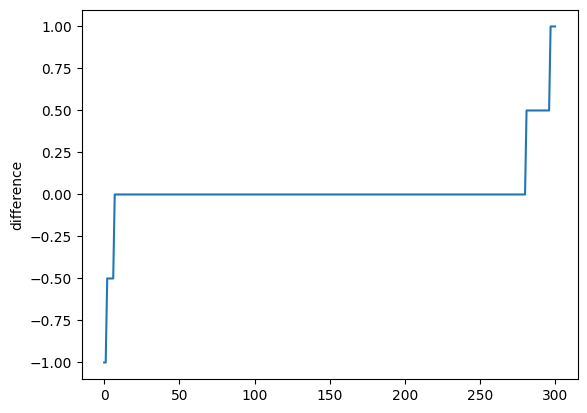

In [ ]:
data_diff = diabetic_test["difference"].sort_values(ascending = True).reset_index()
print(data_diff)
print("Accuracy = ", (np.count_nonzero(diabetic_test["difference"] == 0) / len(data_diff)))
print("Accuracy of TP = ", ((np.count_nonzero((diabetic_test["Diabetic"] == 1) & (diabetic_test["difference"] == 0)) / np.count_nonzero(diabetic_test["Diabetic"] == 1))))
print("Accuracy of TPre = ", ((np.count_nonzero((diabetic_test["Diabetic"] == 0.5) & (diabetic_test["difference"] == 0)) / np.count_nonzero(diabetic_test["Diabetic"] == 0.5))))
print("Accuracy of TN = ", ((np.count_nonzero((diabetic_test["Diabetic"] == 0) & (diabetic_test["difference"] == 0)) / np.count_nonzero(diabetic_test["Diabetic"] == 0))))
sns.lineplot(data_diff['difference'])

# Random Forest and Boosting

In [ ]:
#reseting diabetes dataset to remove classification variable setting and redo data cleaning

df = pd.read_csv("DatasetOfDiabetes.csv")
df['MALE'] = (df['Gender'] == 'M').astype(int)
df = df.drop('Gender', axis=1)
df2 = df[~df['CLASS'].isin(['P'])]
df2['CLASS']= df2["CLASS"].replace(['N ', 'Y '], ['N', 'Y'])
X = df2.drop('CLASS', axis=1)  # Features
y = df2['CLASS']  # Target variable

<ipython-input-91-065a5061e719>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['CLASS']= df2["CLASS"].replace(['N ', 'Y '], ['N', 'Y'])


In [ ]:
#training and testing data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Define Accuracy Function and Perform 5 Fold Cross validation for Random Forest Model

In [ ]:
# Define a custom function to calculate Accuracy from confusion matrix values
def accuracy(tn, fp, fn, tp):
    return (tn + tp)/(tn+fp+fn+tp)

# Define hyperparameter grid for Random Forest model
grid_values = {'max_features': np.linspace(1,16,16, dtype='int32'),
               'min_samples_leaf': [5],
               'n_estimators': [500],
               'random_state': [2024]}
rf = RandomForestClassifier()

# Define K-Fold cross-validation object with 5 folds, random shuffling, and fixed random seed
cv = KFold(n_splits=5,random_state=2024,shuffle=True)
rf_cv = GridSearchCV(rf, param_grid=grid_values, scoring='accuracy', cv=cv,verbose=1)

# Perform hyperparameter tuning and training of Random Forest model on training data
rf_cv.fit(X_train, y_train)

# Initialize Random Forest classifier with optimal hyperparameters obtained from GridSearchCV
rf_optimal = RandomForestClassifier(max_features= rf_cv.best_params_['max_features'], min_samples_leaf=5,
                                    n_estimators=500, random_state=2024)

# Train Random Forest model with optimal hyperparameters on training data
rf_optimal_model = rf_optimal.fit(X_train, y_train)
# Make predictions on test data using trained Random Forest model
y_pred_rf_optimal = rf_optimal_model.predict(X_test)

#Create Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf_optimal)

#Calculate accuracy of Random Forest model using custom accuracy function
model_rf_acc = accuracy(cm_rf.item((0,0)), cm_rf.item((0,1)), cm_rf.item((1, 0)), cm_rf.item((1, 1)))
#Display Accuracy of Random Forest model
print(f'CV Random Forest Test Accuracy: {model_rf_acc:.4f}')

Fitting 5 folds for each of 16 candidates, totalling 80 fits
CV Random Forest Test Accuracy: 0.9789


Boosting

In [ ]:
#reseting dataframe for boosting

df = pd.read_csv("DatasetOfDiabetes.csv")
  #rename columns for consistency
df.rename(columns=str.lower, inplace=True)
  #Map 'Gender': 'M' -> 1, 'F' -> 0
df['gender'] = df['gender'].map({'M': 1, 'F': 0})
  #Map 'CLASS' (diabetes): 'Yes' -> 1, 'No' -> 0
df['class'] = df['class'].str.strip()

df['class'] = df['class'].map({'Y': 1, 'N': 0})
  #normalize/Standardize numeric features (except target and ID columns)
features_to_scale = ['age', 'urea', 'cr', 'hba1c', 'chol', 'tg', 'hdl', 'ldl', 'vldl', 'bmi']
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])
y = df["class"]
X = df.drop(columns=["id", "no_pation", "class"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
df.to_csv("cleaned_diabetes_data.csv", index=False)
df = pd.read_csv("cleaned_diabetes_data.csv")
df = df.dropna(subset=["class"])
X = df.drop(columns=["class"])
y = df["class"]
y.head()

#test train split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Check class distribution

print("Class distribution in y_train:")
print(y_train.value_counts())
X_train_cleaned = X_train.dropna()
X_test_cleaned = X_test.dropna()
y_train_cleaned = y_train.loc[X_train_cleaned.index]
y_test_cleaned = y_test.loc[X_test_cleaned.index]

Class distribution in y_train:
class
1.0    674
0.0     83
Name: count, dtype: int64


In [ ]:
#gradient Boosting Classifier

gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train_cleaned, y_train_cleaned)
y_pred_train = gb_clf.predict(X_train_cleaned)
y_pred_test = gb_clf.predict(X_test_cleaned)

In [ ]:
#testing accuracy

train_accuracy = accuracy_score(y_train_cleaned, y_pred_train)
test_accuracy = accuracy_score(y_test_cleaned, y_pred_test)
y_pred_proba_test = gb_clf.predict_proba(X_test_cleaned)[:, 1]
test_auc = roc_auc_score(y_test_cleaned, y_pred_proba_test)
conf_matrix = confusion_matrix(y_test_cleaned, y_pred_test)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test AUC: {test_auc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Training Accuracy: 1.0000
Test Accuracy: 0.9842
Test AUC: 0.9971
Confusion Matrix:
[[ 19   1]
 [  2 168]]


In [ ]:
# Hyperparameter Tuning with GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(
    estimator=gb_clf,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1
)


grid_search.fit(X_train_cleaned, y_train_cleaned)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best ROC AUC Score: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50}
Best ROC AUC Score: 0.9999


In [ ]:
best_gb_clf = grid_search.best_estimator_
y_pred_test = best_gb_clf.predict(X_test_cleaned)
y_pred_proba_test = best_gb_clf.predict_proba(X_test_cleaned)[:, 1]

test_accuracy = accuracy_score(y_test_cleaned, y_pred_test)
test_auc = roc_auc_score(y_test_cleaned, y_pred_proba_test)
conf_matrix = confusion_matrix(y_test_cleaned, y_pred_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test AUC: {test_auc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Test Accuracy: 0.9895
Test AUC: 0.9959
Confusion Matrix:
[[ 20   0]
 [  2 168]]


# Linear Regression

In [ ]:
#resetting dataframe and performing data cleaning

DoD = pd.read_csv("DatasetOfDiabetes.csv")
DoD_datacleaned = DoD["CLASS"].replace(['N ', 'Y '], ['N', 'Y'])
DoD["CLASS"] = DoD_datacleaned
DoD['Gender'] = DoD['Gender'].map({'M': 1, 'F': 0})
DoD = DoD.dropna()
DoD['Gender'].unique()

array([0., 1.])

In [ ]:
#splitting the train and test data

DoD_train, DoD_test = train_test_split(DoD, test_size=0.3, random_state=88)

In [ ]:
#Linear regression All variables to predict blood sugar level

ols = smf.ols(formula="""HbA1c ~ AGE + Urea + Chol + TG + HDL + LDL + VLDL + BMI + Gender""",
              data=DoD_train)
model1 = ols.fit()
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:                  HbA1c   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     30.32
Date:                Fri, 13 Dec 2024   Prob (F-statistic):           9.92e-45
Time:                        21:19:28   Log-Likelihood:                -1522.8
No. Observations:                 699   AIC:                             3066.
Df Residuals:                     689   BIC:                             3111.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0780      0.686     -1.572      0.1

In [ ]:
#checking for colinearity


# Create a DataFrame with the predictors
X = DoD_train[['AGE', 'Urea', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI', 'Gender']]

# Add a constant term for the VIF calculation
X_with_const = pd.concat([pd.Series(1, index=X.index, name='Intercept'), X], axis=1)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Variable'] = X_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# Display the VIF values
print(vif_data)

    Variable        VIF
0  Intercept  70.959373
1        AGE   1.253716
2       Urea   1.026460
3       Chol   1.583295
4         TG   1.271587
5        HDL   1.162472
6        LDL   1.372386
7       VLDL   1.163696
8        BMI   1.304614
9     Gender   1.096938


In [ ]:
#trying different variable selection based on highed colinearity variables

ols = smf.ols(formula="""HbA1c ~ Urea + Chol + TG + HDL + LDL + VLDL""",
              data=DoD_train)
model1 = ols.fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  HbA1c   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     10.03
Date:                Fri, 13 Dec 2024   Prob (F-statistic):           1.22e-10
Time:                        21:19:33   Log-Likelihood:                -1610.3
No. Observations:                 699   AIC:                             3235.
Df Residuals:                     692   BIC:                             3266.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.4796      0.453     14.298      0.0

In [ ]:
#removing variables based on high p-values (HDL, VLDL)
ols = smf.ols(formula="""HbA1c ~ AGE + Urea + Chol + TG + LDL + BMI + Gender""",
              data=DoD_train)
model1 = ols.fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  HbA1c   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.62
Date:                Fri, 13 Dec 2024   Prob (F-statistic):           8.33e-46
Time:                        21:19:36   Log-Likelihood:                -1524.1
No. Observations:                 699   AIC:                             3064.
Df Residuals:                     691   BIC:                             3101.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2697      0.667     -1.902      0.0

In [ ]:
#testing

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions on the test set
X_test = DoD_test[['AGE', 'Urea', 'Chol', 'TG', 'LDL', 'BMI', 'Gender']]
y_test = DoD_test['HbA1c']
y_pred = model1.predict(sm.add_constant(X_test))

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

# Combine actual and predicted values into a DataFrame
results = pd.DataFrame({
    'Actual HbA1c': y_test,
    'Predicted HbA1c': y_pred
})

# Display the first few rows of the DataFrame
print(results)

Mean Absolute Error (MAE): 1.6829128020199722
Root Mean Squared Error (RMSE): 2.210461673669586
     Actual HbA1c  Predicted HbA1c
5             4.0         5.808693
958           8.5         6.114995
564          11.9         7.827359
528           7.2        10.591177
270           6.5         7.655553
..            ...              ...
338           7.0         9.223373
850           9.9         8.085610
636           6.7         7.689622
370           7.0        10.143051
737          10.1         9.062002

[300 rows x 2 columns]


In [ ]:
# Calculate R-squared on the test data

r2 = r2_score(y_test, y_pred)

print("R-squared (R²):", r2)

R-squared (R²): 0.2285555121437638


Linear Regression is giving poor results! The goal was to see coorelation in factors such as blood glucose levels in predicting Diabetes. In order to use Machine Learning to help us identify useful trends in predicting diabetes we will switch gears and now focus on a different approach that could provide valuable insight on which factors contribute to Diabetes. We will now use clustering. Clustering allows us to see trends in our data by grouping them without focusing on labels, allowing us to see underlying patterns in our data. By comparing these clusters with the amount of members who do/dont have diaebtes we can effecially see which trends could potentially
 impact diabetes health. This will help us see what trends in behavior could contirbute to diabetes

# Clustering

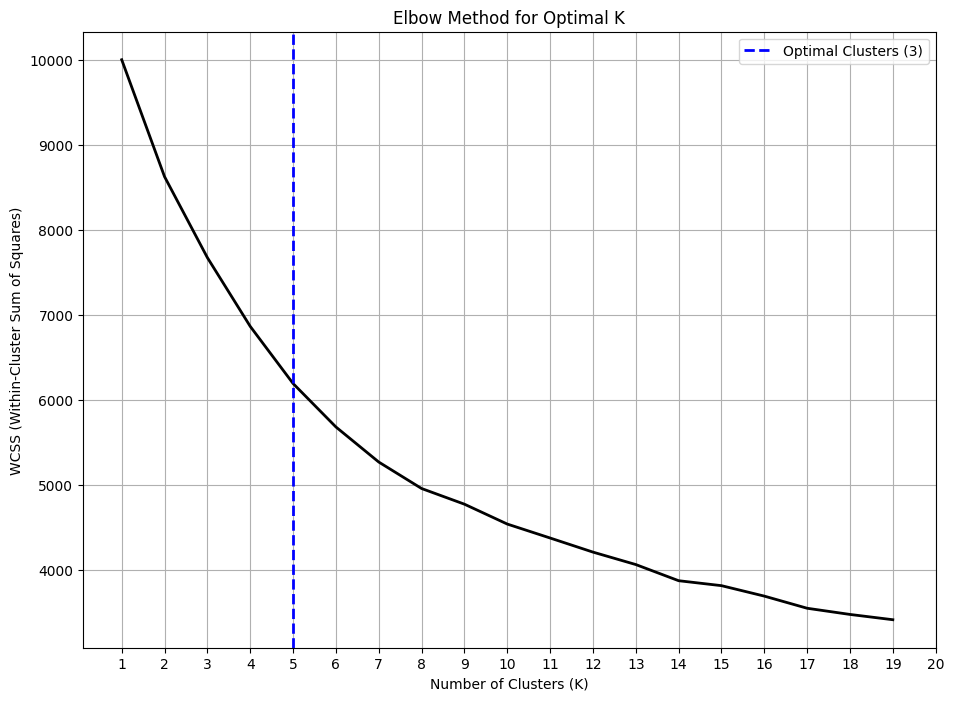

In [ ]:
#restarting dataset, performing data cleaning, and finding optimal K

file_path = "DatasetOfDiabetes.csv"
data = pd.read_csv(file_path)

# Combine "Y" with "Y " and "N" with "N "
data['CLASS'] = data['CLASS'].replace({'Y ': 'Y', 'N ': 'N'})

# Drop the Gender column
data_cleaned_no_gender = data.drop(columns=['ID','No_Pation','Gender'])

# Standardize the features for clustering
scaler = StandardScaler()
data_scaled_no_gender = scaler.fit_transform(data_cleaned_no_gender.drop(columns=['CLASS']))


# Elbow Method to determine the optimal number of clusters
wcss = []
for k in range(1, 20):  # Test for clusters between 1 and 20
    kmeans_elbow = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100, random_state=88)
    kmeans_elbow.fit(data_scaled_no_gender)
    wcss.append(kmeans_elbow.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(11, 8))
plt.plot(range(1, 20), wcss, linewidth=2, color='black')
plt.axvline(x=5, linewidth=2, linestyle="--", color="blue", label="Optimal Clusters (3)")
plt.xticks(range(1, 21))
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.legend()
plt.grid(axis='both')
plt.show()

In [ ]:
#clustering with optimal K

# Perform KMeans clustering with 3 clusters
kmeans_no_gender = KMeans(init='k-means++', n_clusters=3, n_init=10, max_iter=100, random_state=88)
data['KMeans_Cluster_No_Gender'] = kmeans_no_gender.fit_predict(data_scaled_no_gender)


# Compare the number of diabetics in each cluster without Gender
cluster_diabetic_count_no_gender = data.groupby('KMeans_Cluster_No_Gender')['CLASS'].value_counts()
cluster_diabetic_count_no_gender

KMeans_Cluster_No_Gender  CLASS
0                         Y        745
                          N          2
                          P          1
1                         N        100
                          Y         88
                          P         51
2                         Y         11
                          N          1
                          P          1
Name: count, dtype: int64

In [ ]:
#Analyze the results

# Select only numeric columns for analysis
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Calculate mean values for each cluster
cluster_means = data.groupby('KMeans_Cluster_No_Gender')[numeric_columns].mean()

# Display the results
print(cluster_means)

                                  ID      No_Pation        AGE       Urea  \
KMeans_Cluster_No_Gender                                                    
0                         341.504011  224194.136364  56.997326   5.019977   
1                         347.523013  428841.020921  42.682008   4.490795   
2                         153.615385   27783.846154  53.307692  22.807692   

                                  Cr     HbA1c      Chol        TG       HDL  \
KMeans_Cluster_No_Gender                                                       
0                          64.745989  9.168262  4.901364  2.475013  1.203209   
1                          62.129707  5.533473  4.740586  1.927197  1.217782   
2                         435.692308  7.753846  4.892308  2.900000  1.053846   

                               LDL      VLDL        BMI  \
KMeans_Cluster_No_Gender                                  
0                         2.573449  2.023529  31.463610   
1                         2.721967  

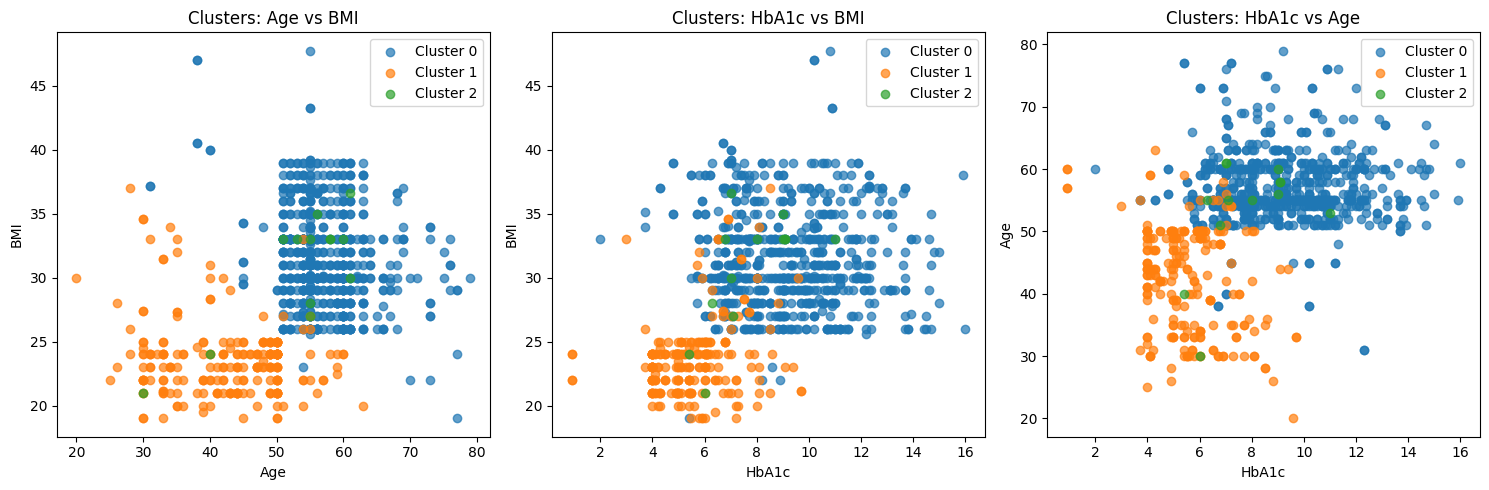

In [ ]:
cluster_labels = data['KMeans_Cluster_No_Gender']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Age vs BMI
for cluster in range(3):
    cluster_data = data[cluster_labels == cluster]
    axes[0].scatter(cluster_data['AGE'], cluster_data['BMI'], label=f'Cluster {cluster}', alpha=0.7)
axes[0].set_title("Clusters: Age vs BMI")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("BMI")
axes[0].legend()

# Plot 2: HbA1c vs BMI
for cluster in range(3):
    cluster_data = data[cluster_labels == cluster]
    axes[1].scatter(cluster_data['HbA1c'], cluster_data['BMI'], label=f'Cluster {cluster}', alpha=0.7)
axes[1].set_title("Clusters: HbA1c vs BMI")
axes[1].set_xlabel("HbA1c")
axes[1].set_ylabel("BMI")
axes[1].legend()

# Plot 3: HbA1c vs Age
for cluster in range(3):
    cluster_data = data[cluster_labels == cluster]
    axes[2].scatter(cluster_data['HbA1c'], cluster_data['AGE'], label=f'Cluster {cluster}', alpha=0.7)
axes[2].set_title("Clusters: HbA1c vs Age")
axes[2].set_xlabel("HbA1c")
axes[2].set_ylabel("Age")
axes[2].legend()

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
from google.colab import drive

os.getcwd()
os.chdir('/content/drive/My Drive/IEORPROJ')
!jupyter nbconvert Appendix.ipynb --to html

[NbConvertApp] Converting notebook Appendix.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 1399755 bytes to Appendix.html
